## Загрузим нужные библиотеки

In [473]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [521]:
df = pd.read_csv("/content/train.csv")

## Рассмотрим датасет по ближе

In [522]:
df.head(3)

,id,area,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-04-30,nd_mean_2021-05-01,...,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-03,nd_mean_2021-06-02,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-05-24,crop
0,1612,40,0.159413,0.251090,0.28886,0.039673,0.301931,0.000000,0.274627,0.079860,...,0.760103,0.413159,0.000000,0.169458,0.568205,0.362157,0.380075,0.360077,0.552304,5
1,978,75,0.231795,0.260749,0.30419,0.483102,0.213664,0.190464,0.342645,0.000000,...,0.119815,0.339988,0.145459,0.000000,0.013604,0.258762,0.271984,0.000000,0.302597,0
2,3050,75,0.000000,0.176574,0.00000,0.291817,0.352851,0.024589,0.000000,0.345859,...,0.305729,0.000000,0.023593,0.149080,0.000000,0.158617,0.419407,0.046266,0.215719,6


In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4898 non-null   int64  
 1   area                4898 non-null   int64  
 2   nd_mean_2021-04-15  4898 non-null   float64
 3   nd_mean_2021-04-16  4898 non-null   float64
 4   nd_mean_2021-04-18  4898 non-null   float64
 5   nd_mean_2021-04-22  4898 non-null   float64
 6   nd_mean_2021-04-26  4898 non-null   float64
 7   nd_mean_2021-04-28  4898 non-null   float64
 8   nd_mean_2021-04-30  4898 non-null   float64
 9   nd_mean_2021-05-01  4898 non-null   float64
 10  nd_mean_2021-05-02  4898 non-null   float64
 11  nd_mean_2021-05-08  4898 non-null   float64
 12  nd_mean_2021-05-15  4898 non-null   float64
 13  nd_mean_2021-05-16  4898 non-null   float64
 14  nd_mean_2021-05-17  4898 non-null   float64
 15  nd_mean_2021-05-26  4898 non-null   float64
 16  nd_mea

Рассмотрим единственный не числовой столбец

In [524]:
df.select_dtypes(include=['object'])

,.geo
0,"{""type"":""Polygon"",""coordinates"":[[[49.33090116..."
1,"{""type"":""Polygon"",""coordinates"":[[[41.41193007..."
2,"{""type"":""Polygon"",""coordinates"":[[[40.88636263..."
3,"{""type"":""Polygon"",""coordinates"":[[[33.86367532..."
4,"{""type"":""Polygon"",""coordinates"":[[[56.31367947..."
...,...
4893,"{""type"":""Polygon"",""coordinates"":[[[34.97927998..."
4894,"{""type"":""Polygon"",""coordinates"":[[[45.02292349..."
4895,"{""type"":""Polygon"",""coordinates"":[[[45.37757811..."
4896,"{""type"":""Polygon"",""coordinates"":[[[62.80767351..."


Это столбец **.geo**

Тепепрь рассмотрим главный столбец с C/Х культурой

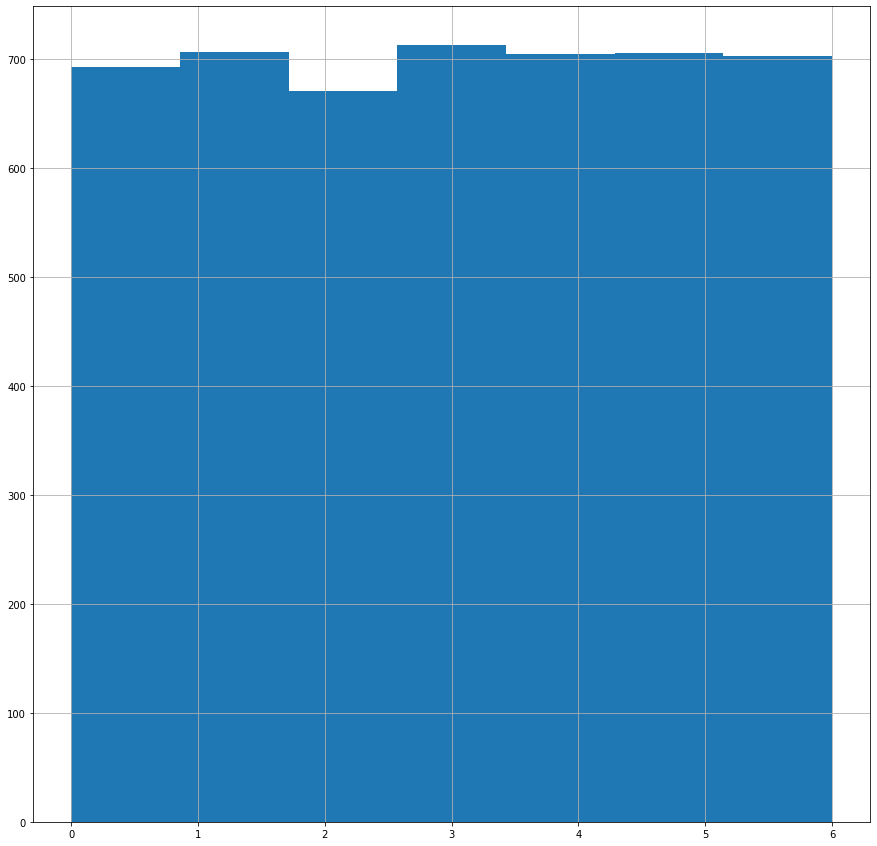

In [525]:
df["crop"].hist(bins = 7)

Заметен слабый разброс популярности категориий

In [526]:
df["crop"].value_counts()

3    713
1    707
5    706
4    705
6    703
0    693
2    671
Name: crop, dtype: int64

Посмотрим на разброс площади полей

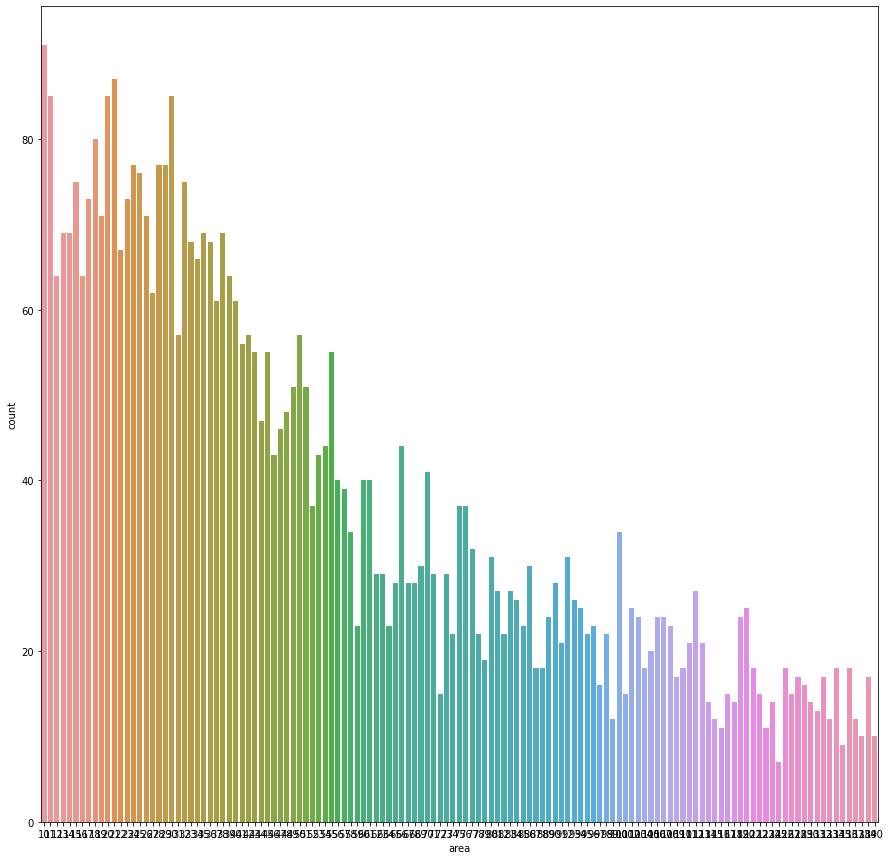

In [527]:
sns.countplot(x = "area" , data  = df)  

Постараемся найти закономерность

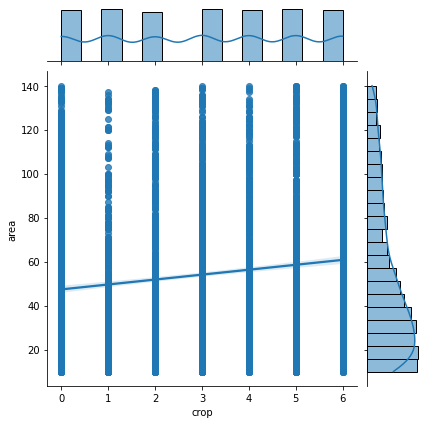

In [528]:
sns.jointplot(x = "crop", y = 'area', data = df, kind = 'reg')

Кажется нет четкой зависимости между категорией культуры и площадью территроии

Последняя попытка найти явную зависимость в данных

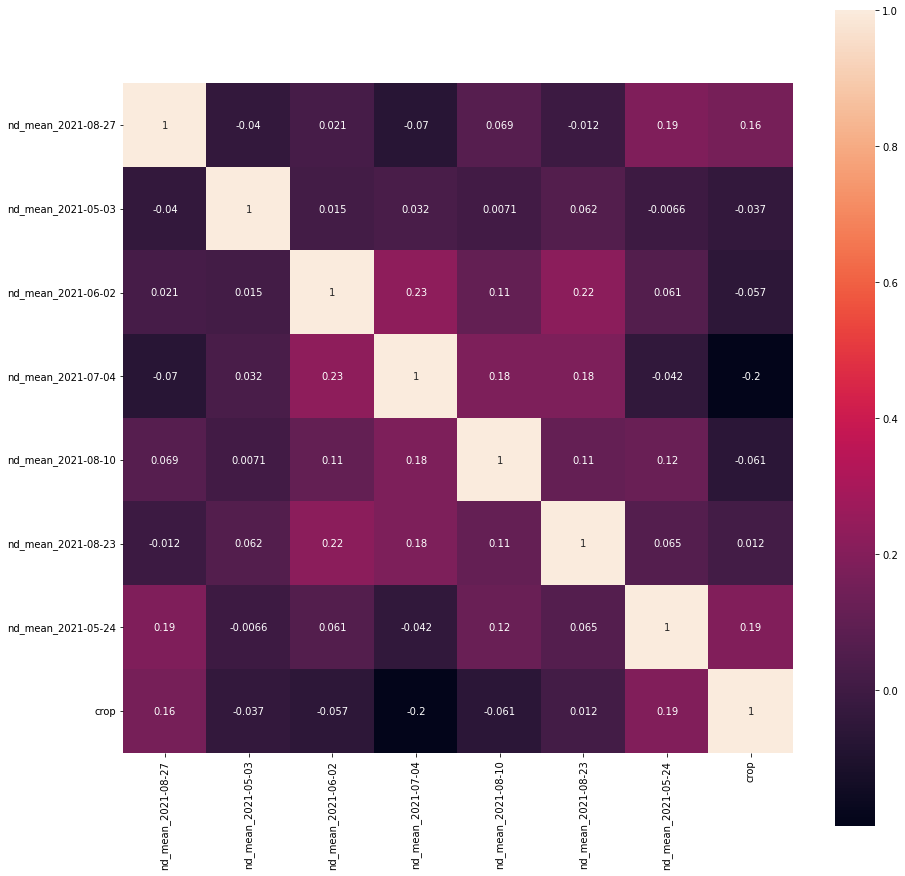

In [529]:
plt.rcParams['figure.figsize']=(15,15)

corr = df.loc[:, "nd_mean_2021-08-27":"crop"].corr()
g = sns.heatmap(corr, square = True, annot=True)

## Выделим выборки

In [530]:
X = df.drop(["id",".geo", "crop"], axis = 1)
y = df[["crop"]]

In [531]:
X.head()

,area,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-04-30,nd_mean_2021-05-01,nd_mean_2021-05-02,...,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-03,nd_mean_2021-06-02,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-05-24
0,40,0.159413,0.251090,0.288860,0.039673,0.301931,0.000000,0.274627,0.079860,0.142140,...,0.651197,0.760103,0.413159,0.000000,0.169458,0.568205,0.362157,0.380075,0.360077,0.552304
1,75,0.231795,0.260749,0.304190,0.483102,0.213664,0.190464,0.342645,0.000000,0.396637,...,0.353390,0.119815,0.339988,0.145459,0.000000,0.013604,0.258762,0.271984,0.000000,0.302597
2,75,0.000000,0.176574,0.000000,0.291817,0.352851,0.024589,0.000000,0.345859,0.145083,...,0.031849,0.305729,0.000000,0.023593,0.149080,0.000000,0.158617,0.419407,0.046266,0.215719
3,55,0.000000,0.317001,0.267246,0.000000,0.265689,0.038065,0.000000,0.533367,0.276083,...,0.009670,0.129912,0.588483,0.020564,0.073617,0.804204,0.820184,0.018503,0.807123,0.202017
4,25,0.083827,0.000000,0.167003,0.308370,0.150439,0.179282,0.192157,0.328494,0.132613,...,0.072474,0.015783,0.143457,0.215363,0.101592,0.068873,0.190155,0.068211,0.379317,0.275945


## Обучение модели

In [532]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [539]:
clf = RandomForestClassifier(random_state=0, n_estimators = 3)

In [540]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=3, random_state=0)

## Оценка точности

In [541]:
from sklearn.metrics import recall_score, precision_score

pred = clf.predict(X_test)
print(clf,'\n',recall_score(y_test, pred, average="macro", zero_division=0))

RandomForestClassifier(n_estimators=3, random_state=0) 
 0.6559326854718475
